In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../14_trees/train.tsv", sep="\t").dropna()

In [3]:
data

,species,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m
0,Fagus sylvatica,46.01,11.44,5.0,6.7,2.05
1,Fagus sylvatica,46.03,11.44,5.0,11.1,2.90
2,Fagus sylvatica,46.03,11.44,5.0,14.2,4.00
3,Fagus sylvatica,46.03,11.44,5.0,5.7,2.10
4,Fagus sylvatica,46.03,11.44,5.0,8.0,4.15
...,...,...,...,...,...,...
35094,Fagus sylvatica,47.38,9.09,36.0,22.6,4.50
35095,Fagus sylvatica,46.74,6.85,37.0,34.3,4.50
35096,Fagus sylvatica,47.45,9.29,38.0,33.8,5.00
35097,Fagus sylvatica,46.52,6.35,40.0,29.3,6.00


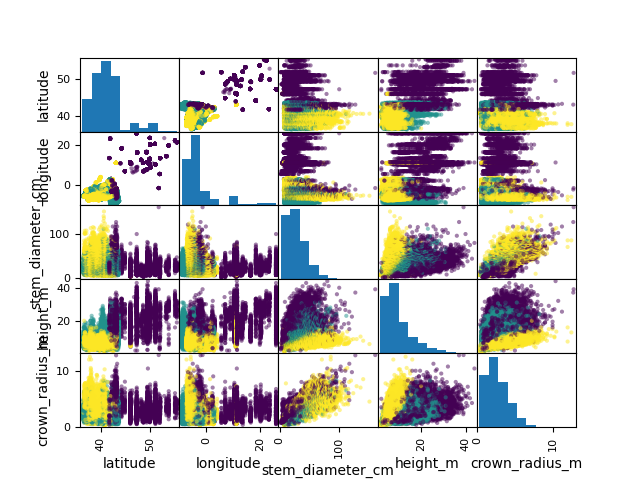

In [70]:
_ = pd.plotting.scatter_matrix(data, c=data.species.astype('category').cat.codes)

In [4]:
import numpy as np

In [5]:
X,y = np.array(data.iloc[:,1:]), np.array(data.species)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,y)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
knn.score(X_val, y_val)

0.9179867143587123

In [12]:
y_val_pred = knn.predict(X_val)
y_val_pred

array(['Pinus pinaster', 'Fagus sylvatica', 'Pinus pinaster', ...,
       'Quercus ilex', 'Fagus sylvatica', 'Quercus ilex'], dtype=object)

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
cm = confusion_matrix(y_val, knn.predict(X_val))
cm

array([[1284,   66,   24],
       [  36, 2016,  290],
       [  23,  203, 3886]])

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib widget

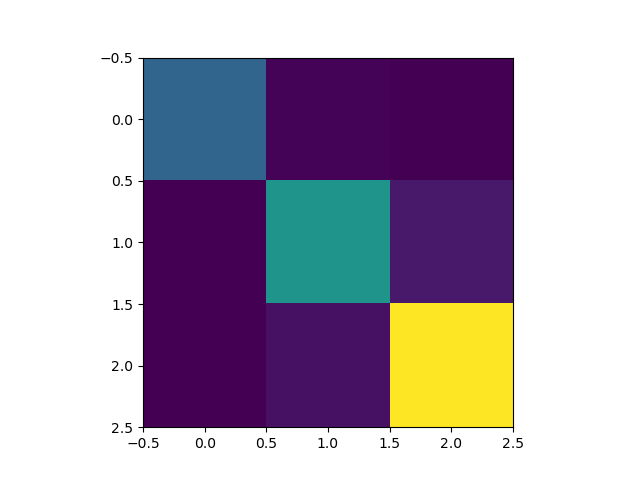

In [17]:
plt.imshow(cm)

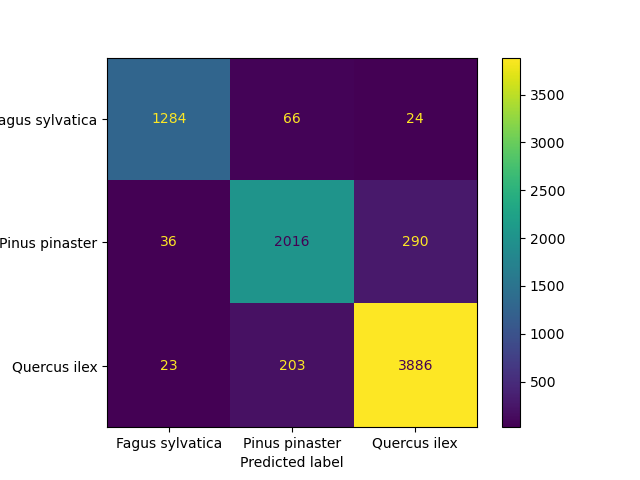

In [18]:
ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val)

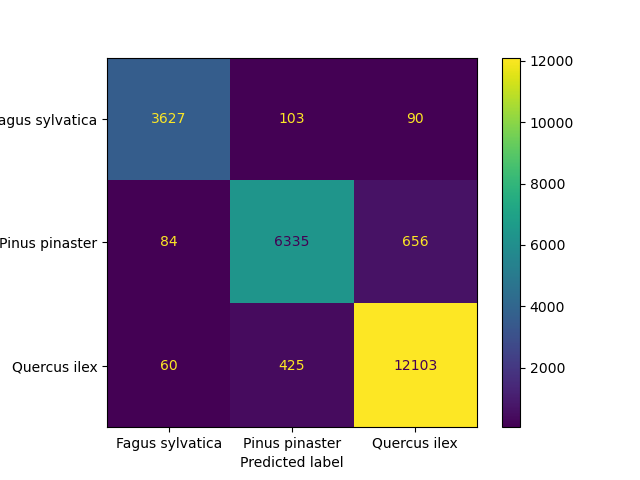

In [19]:
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train)

In [20]:
import sklearn.metrics

In [21]:
sklearn.metrics.cohen_kappa_score(y_val, y_val_pred)

0.8634741368968449

In [22]:
sklearn.metrics.cohen_kappa_score(y_train, knn.predict(X_train))

0.8980897129955527

In [23]:
sklearn.metrics.precision_score(y_val, knn.predict(X_val),average=None)

array([0.9560685 , 0.88227571, 0.9252381 ])

In [24]:
sklearn.metrics.recall_score(y_val, knn.predict(X_val),average=None)

array([0.93449782, 0.86080273, 0.94503891])

In [25]:
sklearn.metrics.matthews_corrcoef(y_val, knn.predict(X_val))

0.8636260845729852

In [26]:
print(sklearn.metrics.classification_report(y_val, y_val_pred))

                 precision    recall  f1-score   support

Fagus sylvatica       0.96      0.93      0.95      1374
 Pinus pinaster       0.88      0.86      0.87      2342
   Quercus ilex       0.93      0.95      0.94      4112

       accuracy                           0.92      7828
      macro avg       0.92      0.91      0.92      7828
   weighted avg       0.92      0.92      0.92      7828



In [28]:
knn.predict_proba(X_val)

array([[0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       ...,
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

In [29]:
cl = list(knn.classes_)
y_val_ind = np.array([cl.index(y) for y in y_val])

In [30]:
y_val_proba = np.take_along_axis(knn.predict_proba(X_val), y_val_ind[:,None], axis=1).flatten()

In [31]:
sklearn.metrics.roc_auc_score(y_val, knn.predict_proba(X_val), multi_class="ovr", average=None)

array([0.98884582, 0.96293391, 0.97470748])

In [32]:
knn.classes_

array(['Fagus sylvatica', 'Pinus pinaster', 'Quercus ilex'], dtype=object)

In [33]:
from sklearn.decomposition import PCA

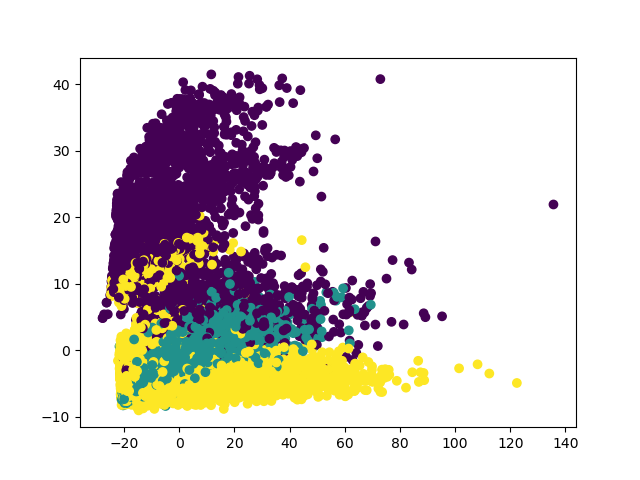

In [41]:
pc = PCA(n_components=2)
pos = pc.fit_transform(X_train)
fig, ax = plt.subplots()
plt.scatter([x[0] for x in pos], [x[1] for x in pos], c=[list(knn.classes_).index(y) for y in y_train])

In [45]:
X_train.min(axis=0), X_train.max(axis=0)

(array([36.263, -9.148,  2.   ,  1.5  ,  0.25 ]),
 array([ 55.451,  26.   , 162.   ,  41.9  ,  12.8  ]))

In [47]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [75]:
X_train_std = scaler.transform(X_train)

In [50]:
X_train_std.min(axis=0), X_train_std.max(axis=0)

(array([-1.58387253, -1.03276163, -1.59397709, -1.3271749 , -1.70635951]),
 array([4.50448751, 4.25290169, 8.10567512, 5.20917918, 6.91498001]))

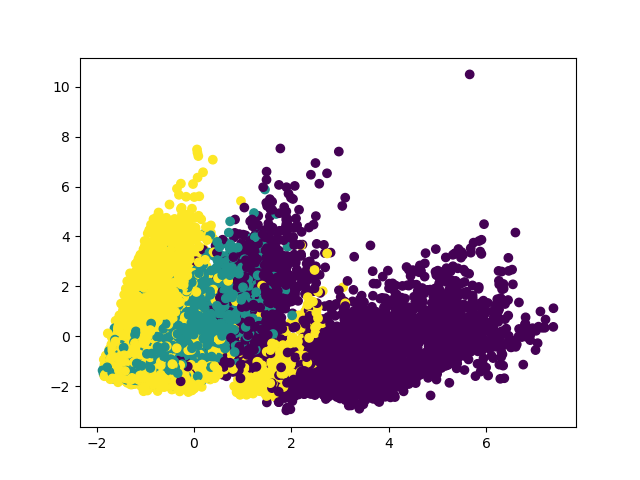

In [51]:
pc = PCA(n_components=2)
pos = pc.fit_transform(X_train_std)
fig, ax = plt.subplots()
plt.scatter([x[0] for x in pos], [x[1] for x in pos], c=[list(knn.classes_).index(y) for y in y_train])

In [72]:
knn.score(X_val, y_val)

0.9179867143587123

In [73]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [76]:
knn.score(scaler.transform(X_val), y_val)

0.9291006642820644